<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_data(y_hat)_multi_delta_(3_6)_n60_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_3.6'

In [4]:
os.listdir(base_path)

['data_multi_delta_3.6_n20.csv',
 'data_multi_delta_3.6_n30.csv',
 'data_multi_delta_3.6_n60.csv',
 'data_multi_delta_3.6_n120.csv',
 'data_multi_delta_3.6_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_3.6_n60.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,55.850996,86.894320,83.633589,-61.527002,174.851904,955.411275,-780.559371
1,0.0,1.0,81.758639,87.118368,66.929625,-2303.560050,-2057.753418,59.541333,-2117.294751
2,0.0,2.0,34.325488,53.345268,63.070759,-1147.088946,-986.347430,599.524648,-1585.872078
3,0.0,3.0,63.643253,65.343185,56.218140,-307.161660,-111.957081,-29.113507,-82.843574
4,0.0,4.0,92.229808,35.464765,77.802366,1119.496705,1334.993643,53.402622,1281.591021
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,68.650906,68.741467,37.945780,2635.042812,2820.380965,-481.767314,3302.148279
59996,999.0,56.0,40.005950,40.140697,72.036585,832.773051,994.956282,539.396519,455.559764
59997,999.0,57.0,78.034927,26.168196,25.250527,56.359801,195.813450,-629.180872,824.994322
59998,999.0,58.0,81.485699,87.894913,87.163626,1783.639271,2050.183509,-340.319594,2390.503102


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,55.850996,86.894320,83.633589,-61.527002,174.851904,955.411275,-780.559371
1,0.0,1.0,81.758639,87.118368,66.929625,-2303.560050,-2057.753418,59.541333,-2117.294751
2,0.0,2.0,34.325488,53.345268,63.070759,-1147.088946,-986.347430,599.524648,-1585.872078
3,0.0,3.0,63.643253,65.343185,56.218140,-307.161660,-111.957081,-29.113507,-82.843574
4,0.0,4.0,92.229808,35.464765,77.802366,1119.496705,1334.993643,53.402622,1281.591021
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,68.650906,68.741467,37.945780,2635.042812,2820.380965,-481.767314,3302.148279
59996,999.0,56.0,40.005950,40.140697,72.036585,832.773051,994.956282,539.396519,455.559764
59997,999.0,57.0,78.034927,26.168196,25.250527,56.359801,195.813450,-629.180872,824.994322
59998,999.0,58.0,81.485699,87.894913,87.163626,1783.639271,2050.183509,-340.319594,2390.503102


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2  ...       y_hat        e_hat
rep   index                        ...                         
0.0   0.0    55.850996  86.894320  ...  955.411275  -780.559371
      1.0    81.758639  87.118368  ...   59.541333 -2117.294751
      2.0    34.325488  53.345268  ...  599.524648 -1585.872078
      3.0    63.643253  65.343185  ...  -29.113507   -82.843574
      4.0    92.229808  35.464765  ...   53.402622  1281.591021
...                ...        ...  ...         ...          ...
999.0 55.0   68.650906  68.741467  ... -481.767314  3302.148279
      56.0   40.005950  40.140697  ...  539.396519   455.559764
      57.0   78.034927  26.168196  ... -629.180872   824.994322
      58.0   81.485699  87.894913  ... -340.319594  2390.503102
      59.0   54.709214  87.014043  ...   42.372698  6105.320220

[60000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2  ...       y_hat        e_hat
rep   index                        ...                         
0.0   0.0    55.850996  86.894320  ...  955.411275  -780.559371
      1.0    81.758639  87.118368  ...   59.541333 -2117.294751
      2.0    34.325488  53.345268  ...  599.524648 -1585.872078
      3.0    63.643253  65.343185  ...  -29.113507   -82.843574
      4.0    92.229808  35.464765  ...   53.402622  1281.591021
...                ...        ...  ...         ...          ...
999.0 55.0   68.650906  68.741467  ... -481.767314  3302.148279
      56.0   40.005950  40.140697  ...  539.396519   455.559764
      57.0   78.034927  26.168196  ... -629.180872   824.994322
      58.0   81.485699  87.894913  ... -340.319594  2390.503102
      59.0   54.709214  87.014043  ...   42.372698  6105.320220

[60000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,55.850996,86.894320,83.633589,-61.527002,174.851904,955.411275,-780.559371
1,0.0,1.0,81.758639,87.118368,66.929625,-2303.560050,-2057.753418,59.541333,-2117.294751
2,0.0,2.0,34.325488,53.345268,63.070759,-1147.088946,-986.347430,599.524648,-1585.872078
3,0.0,3.0,63.643253,65.343185,56.218140,-307.161660,-111.957081,-29.113507,-82.843574
4,0.0,4.0,92.229808,35.464765,77.802366,1119.496705,1334.993643,53.402622,1281.591021
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,68.650906,68.741467,37.945780,2635.042812,2820.380965,-481.767314,3302.148279
59996,999.0,56.0,40.005950,40.140697,72.036585,832.773051,994.956282,539.396519,455.559764
59997,999.0,57.0,78.034927,26.168196,25.250527,56.359801,195.813450,-629.180872,824.994322
59998,999.0,58.0,81.485699,87.894913,87.163626,1783.639271,2050.183509,-340.319594,2390.503102


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2  ...       y_hat        e_hat
rep   index                        ...                         
0.0   0.0    55.850996  86.894320  ...  955.411275  -780.559371
      1.0    81.758639  87.118368  ...   59.541333 -2117.294751
      2.0    34.325488  53.345268  ...  599.524648 -1585.872078
      3.0    63.643253  65.343185  ...  -29.113507   -82.843574
      4.0    92.229808  35.464765  ...   53.402622  1281.591021
...                ...        ...  ...         ...          ...
999.0 55.0   68.650906  68.741467  ... -481.767314  3302.148279
      56.0   40.005950  40.140697  ...  539.396519   455.559764
      57.0   78.034927  26.168196  ... -629.180872   824.994322
      58.0   81.485699  87.894913  ... -340.319594  2390.503102
      59.0   54.709214  87.014043  ...   42.372698  6105.320220

[60000 rows x 7 columns]

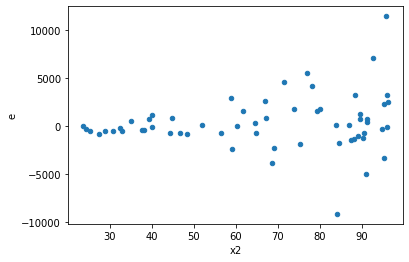

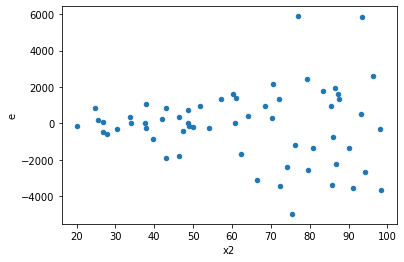

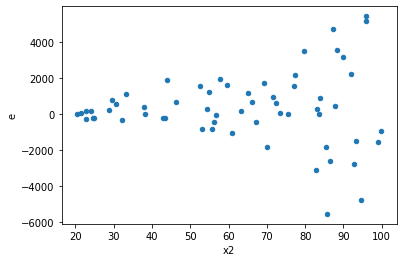

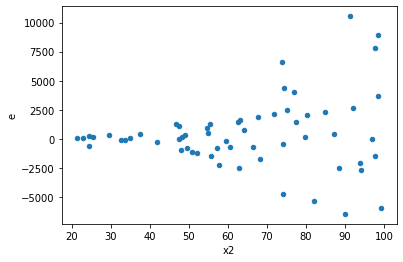

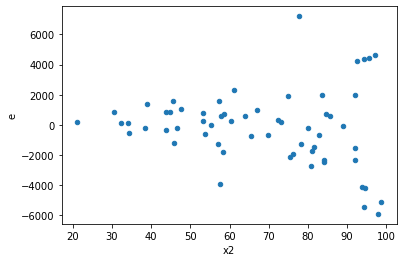

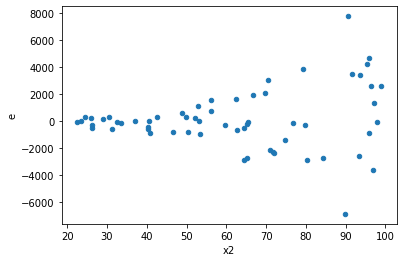

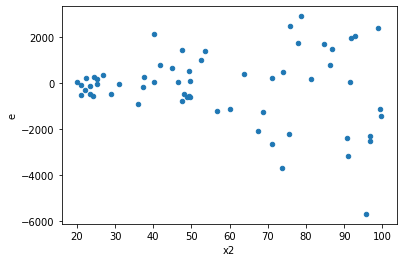

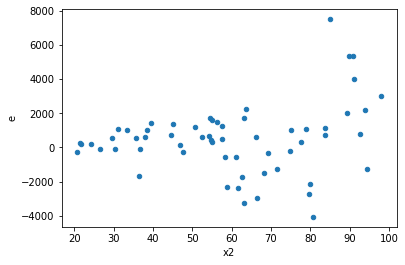

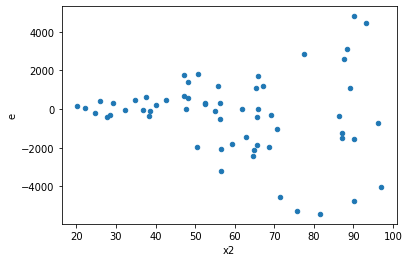

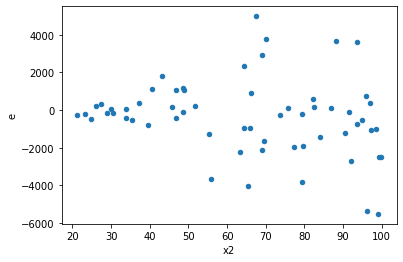

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
2.0,21.0,21.0,21863057.90226785,61675517.03573394,1041097.9953460882,2936929.3826539973,2.82099225604376,0.021498882512475337,0.9892505587437623,0.010749441256237668,Reject005=0 : Heteroscedasticity
3.0,21.0,21.0,22690256.016856898,68219584.31121187,1080488.3817550903,3248551.6338672317,3.00655859768751,0.014926613521200505,0.9925366932393997,0.007463306760600252,Reject005=0 : Heteroscedasticity
7.0,21.0,21.0,48718421.18404914,82585010.11320925,2319924.8182880543,3932619.5292004403,1.6951495575199045,0.23474476913159492,0.8826276154342025,0.11737238456579746,Reject005=1 : Homoscedasticity
9.0,21.0,21.0,28778604.36718454,52740680.419210956,1370409.7317706924,2511460.9723433787,1.8326350974597543,0.17339027444582045,0.9133048627770898,0.08669513722291022,Reject005=1 : Homoscedasticity
10.0,21.0,21.0,37402799.57492668,309067705.3625596,1781085.6940441276,14717509.779169505,8.263223846210327,9.545877099226274e-06,0.9999952270614504,4.772938549613137e-06,Reject005=0 : Heteroscedasticity
12.0,21.0,21.0,59829805.070826724,66443603.01238626,2849038.3367060344,3163981.095827917,1.1105435315012326,0.8123892551495655,0.5938053724252172,0.40619462757478275,Reject005=1 : Homoscedasticity
13.0,21.0,21.0,56898771.137778185,321866412.22329414,2709465.2922751517,15326972.010633055,5.656825372272224,0.0002031826949235871,0.9998984086525382,0.00010159134746179355,Reject005=0 : Heteroscedasticity
15.0,21.0,21.0,17209705.93481346,213880841.96082067,819509.8064196885,10184801.998134319,12.427919615300446,2.650930226444359e-07,0.9999998674534887,1.3254651132221795e-07,Reject005=0 : Heteroscedasticity
17.0,21.0,21.0,24749019.64330808,116254661.44966654,1178524.7449194323,5535936.259507931,4.697344101914792,0.0008077904931136359,0.9995961047534432,0.00040389524655681797,Reject005=0 : Heteroscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,21.0,21.0,79451766.31102262,58558959.460656226,3783417.44338203,2788521.879078868,0.7370378555389288,0.4904950377177862,Reject005=1 : Homoscedasticity
1.0,21.0,21.0,154319530.36877275,6124409.144712707,7348549.065179654,291638.5307006051,0.039686546026140634,3.306650241260735e-10,Reject005=0 : Heteroscedasticity
2.0,21.0,21.0,21863057.90226785,61675517.03573394,1041097.9953460882,2936929.3826539973,2.82099225604376,0.021498882512475337,Reject005=0 : Heteroscedasticity
3.0,21.0,21.0,22690256.016856898,68219584.31121187,1080488.3817550903,3248551.6338672317,3.00655859768751,0.014926613521200505,Reject005=0 : Heteroscedasticity
4.0,21.0,21.0,181165659.38690636,12352391.421120023,8626936.161281254,588209.1152914297,0.06818285243970904,5.7926999488828156e-08,Reject005=0 : Heteroscedasticity
5.0,21.0,21.0,132727837.51239999,30437009.549875725,6320373.21487619,1449381.4071369392,0.2293189591598083,0.0013680561228862215,Reject005=0 : Heteroscedasticity
6.0,21.0,21.0,64285389.699149095,32508190.497168824,3061209.033292814,1548009.0712937536,0.5056855165583466,0.12616183222692057,Reject005=1 : Homoscedasticity
7.0,21.0,21.0,48718421.18404914,82585010.11320925,2319924.8182880543,3932619.5292004403,1.6951495575199045,0.23474476913159492,Reject005=1 : Homoscedasticity
8.0,21.0,21.0,164333811.5015558,75900421.74722296,7825419.595312181,3614305.7974868077,0.46186734825720505,0.08394467255535681,Reject005=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    657
Reject005=1 : Homoscedasticity      343
Name: Result_test, dtype: int64